In [17]:
import igraph as ig
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

In [4]:
%matplotlib inline

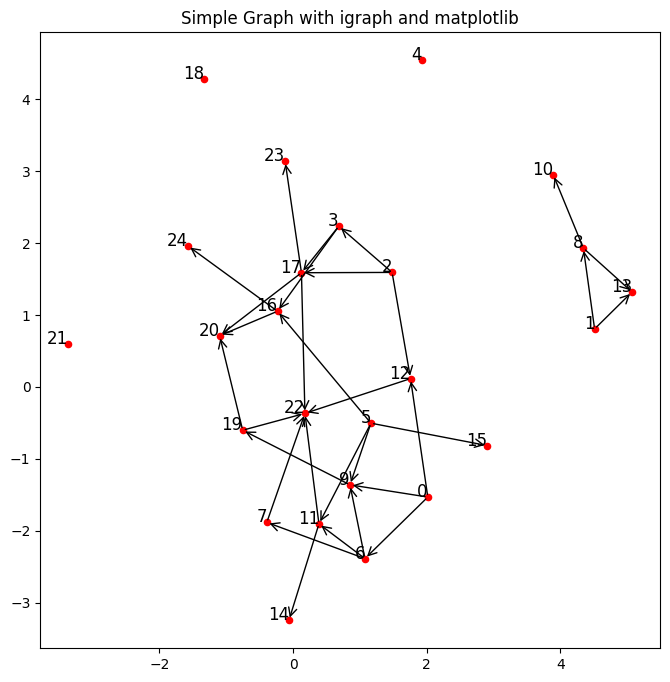

In [18]:
# Create the graph
graph = ig.Graph.Erdos_Renyi(25, 0.1)

# Step 2: Plot the graph with matplotlib
# Get the layout for the graph
layout = graph.layout("fr")  # Fruchterman-Reingold layout

# Get node coordinates
x, y = zip(*[(layout[i][0], layout[i][1]) for i in range(len(layout))])

# Plot the graph
plt.figure(figsize=(8, 8))
plt.scatter(x, y, s=20, color='red')  # Plot nodes

# # Plot edges
# for edge in graph.get_edgelist():
#     x_coords = [layout[edge[0]][0], layout[edge[1]][0]]
#     y_coords = [layout[edge[0]][1], layout[edge[1]][1]]
#     plt.plot(x_coords, y_coords, color='black')

# Plot directed edges as arrows
for edge in graph.get_edgelist():
    start_vertex = layout[edge[0]]
    end_vertex = layout[edge[1]]
    arrow = FancyArrowPatch((start_vertex[0], start_vertex[1]), (end_vertex[0], end_vertex[1]),
                            arrowstyle='->', color='black', mutation_scale=15)
    plt.gca().add_patch(arrow)
    
# Add labels to the nodes
for i, (x_coord, y_coord) in enumerate(zip(x, y)):
    plt.text(x_coord, y_coord, str(i), fontsize=12, ha='right')

plt.title("Simple Graph with igraph and matplotlib")
plt.show()

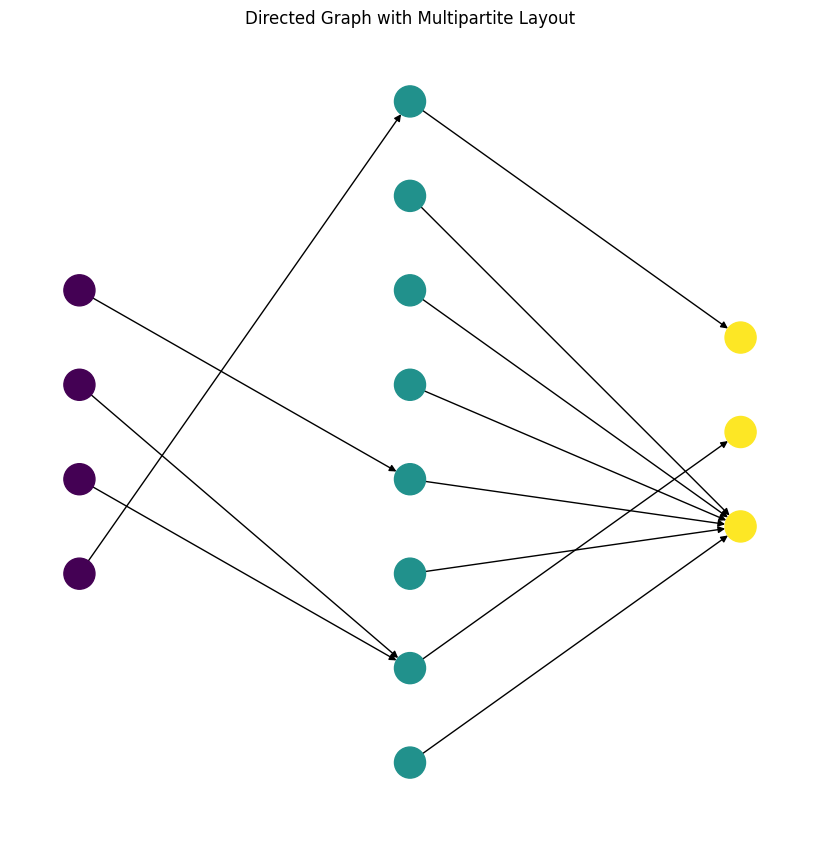

In [23]:
import igraph as ig
import networkx as nx
import matplotlib.pyplot as plt
import random

# Step 1: Create the graph with igraph
num_nodes = 15  # Total number of nodes
groups = {0: [], 1: [], 2: []}

# Assign nodes to groups
for node in range(num_nodes):
    group = random.choice([0, 1, 2])
    groups[group].append(node)

# Create directed edges based on group rules
edges = []
for node in range(num_nodes):
    group = [group for group, nodes in groups.items() if node in nodes][0]
    if group == 0:
        # Group 0 can point to Group 1
        target = random.choice(groups[1]) if groups[1] else None
    elif group == 1:
        # Group 1 can point to Group 2
        target = random.choice(groups[2]) if groups[2] else None
    else:
        target = None

    if target is not None:
        edges.append((node, target))

# Create the igraph graph
graph = ig.Graph(directed=True)
graph.add_vertices(num_nodes)
graph.add_edges(edges)

# Add group attribute to each node
for group, nodes in groups.items():
    for node in nodes:
        graph.vs[node]['group'] = group

# Step 2: Convert to networkx graph for plotting
nx_graph = nx.DiGraph()
for v in graph.vs:
    nx_graph.add_node(v.index, group=v['group'])

for edge in edges:
    nx_graph.add_edge(edge[0], edge[1])

# Step 3: Plot the graph
plt.figure(figsize=(8, 8))
pos = nx.multipartite_layout(nx_graph, subset_key='group')
nx.draw(nx_graph, pos, node_size=500, node_color=[v['group'] for v in graph.vs], cmap=plt.cm.viridis, edge_color='black', font_color='white')
plt.title("Directed Graph with Multipartite Layout")
plt.show()

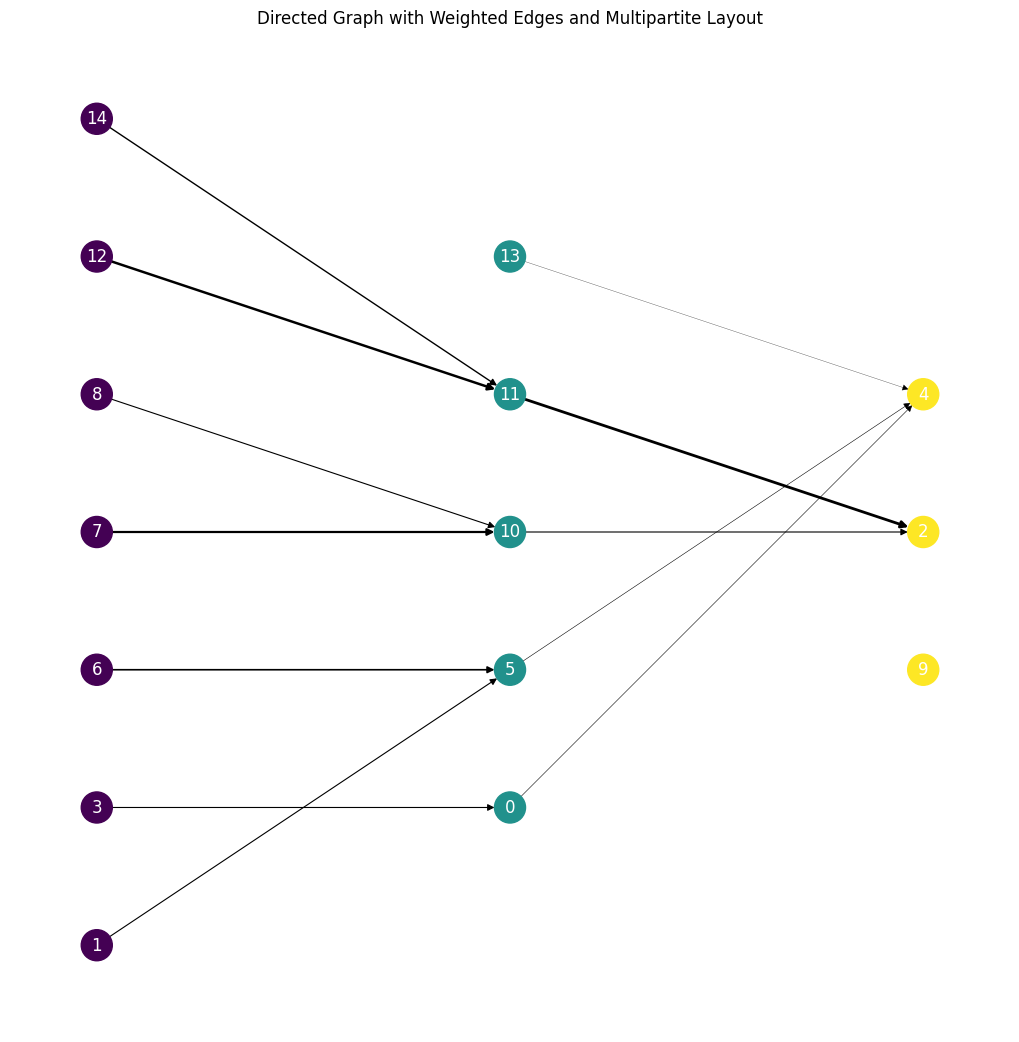

In [25]:
import igraph as ig
import networkx as nx
import matplotlib.pyplot as plt
import random

# Step 1: Create the graph with igraph
num_nodes = 15  # Total number of nodes
groups = {0: [], 1: [], 2: []}

# Assign nodes to groups
for node in range(num_nodes):
    group = random.choice([0, 1, 2])
    groups[group].append(node)

# Create directed edges based on group rules and assign random weights
edges = []
weights = []
for node in range(num_nodes):
    group = [group for group, nodes in groups.items() if node in nodes][0]
    if group == 0:
        # Group 0 can point to Group 1
        target = random.choice(groups[1]) if groups[1] else None
    elif group == 1:
        # Group 1 can point to Group 2
        target = random.choice(groups[2]) if groups[2] else None
    else:
        target = None

    if target is not None:
        weight = random.randint(1, 10)
        edges.append((node, target))
        weights.append(weight)

# Create the igraph graph
graph = ig.Graph(directed=True)
graph.add_vertices(num_nodes)
graph.add_edges(edges)
graph.es['weight'] = weights  # Add weights to the edges

# Add group attribute to each node
for group, nodes in groups.items():
    for node in nodes:
        graph.vs[node]['group'] = group

# Step 2: Convert to networkx graph for plotting
nx_graph = nx.DiGraph()
for v in graph.vs:
    nx_graph.add_node(v.index, group=v['group'])

for edge, weight in zip(edges, weights):
    nx_graph.add_edge(edge[0], edge[1], weight=weight)

# Step 3: Plot the graph
plt.figure(figsize=(10, 10))
pos = nx.multipartite_layout(nx_graph, subset_key='group')
weights = nx.get_edge_attributes(nx_graph, 'weight')
edges = nx_graph.edges(data=True)
edge_weights = [edge[2]['weight'] for edge in edges]

# Draw the graph
nx.draw(nx_graph, pos, with_labels=True, node_size=500, node_color=[v['group'] for v in graph.vs],
        cmap=plt.cm.viridis, edge_color='black', font_color='white', width=[w * 0.2 for w in edge_weights])
plt.title("Directed Graph with Weighted Edges and Multipartite Layout")
plt.show()

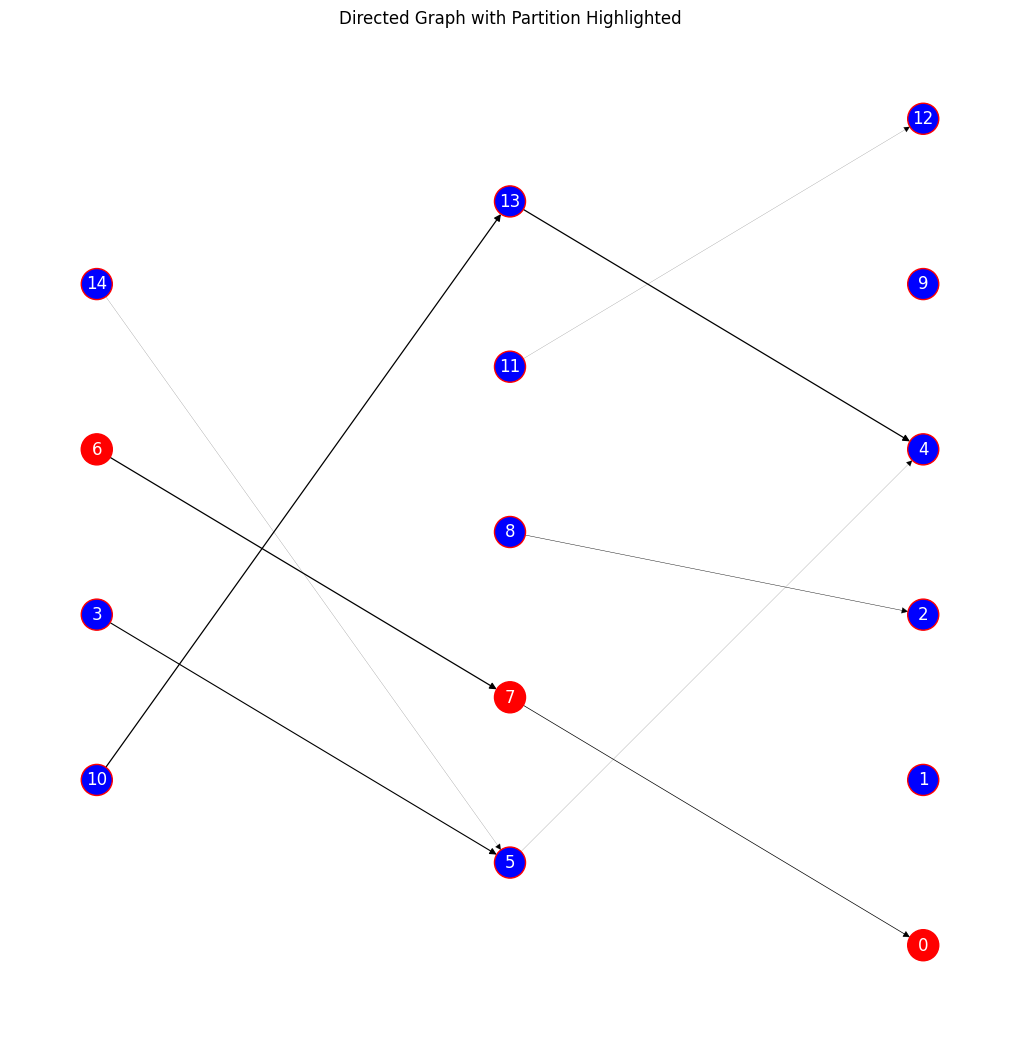

In [26]:
import igraph as ig
import networkx as nx
import matplotlib.pyplot as plt
import leidenalg
import random

# Step 1: Create the graph with igraph
num_nodes = 15  # Total number of nodes
groups = {0: [], 1: [], 2: []}

# Assign nodes to groups
for node in range(num_nodes):
    group = random.choice([0, 1, 2])
    groups[group].append(node)

# Create directed edges based on group rules and assign random weights
edges = []
weights = []
for node in range(num_nodes):
    group = [group for group, nodes in groups.items() if node in nodes][0]
    if group == 0:
        # Group 0 can point to Group 1
        target = random.choice(groups[1]) if groups[1] else None
    elif group == 1:
        # Group 1 can point to Group 2
        target = random.choice(groups[2]) if groups[2] else None
    else:
        target = None

    if target is not None:
        weight = random.randint(1, 10)
        edges.append((node, target))
        weights.append(weight)

# Create the igraph graph
graph = ig.Graph(directed=True)
graph.add_vertices(num_nodes)
graph.add_edges(edges)
graph.es['weight'] = weights  # Add weights to the edges

# Add group attribute to each node
for group, nodes in groups.items():
    for node in nodes:
        graph.vs[node]['group'] = group

# Step 2: Find the partition using Leiden algorithm
part = leidenalg.find_partition(graph, leidenalg.ModularityVertexPartition)

# Step 3: Convert to networkx graph for plotting
nx_graph = nx.DiGraph()
for v in graph.vs:
    nx_graph.add_node(v.index, group=v['group'], part=v.index in part[0])

for edge, weight in zip(edges, weights):
    nx_graph.add_edge(edge[0], edge[1], weight=weight)

# Step 4: Plot the graph with the partition highlighted
plt.figure(figsize=(10, 10))
pos = nx.multipartite_layout(nx_graph, subset_key='group')
weights = nx.get_edge_attributes(nx_graph, 'weight')
edges = nx_graph.edges(data=True)
edge_weights = [edge[2]['weight'] for edge in edges]

# Draw the graph
node_colors = ['red' if nx_graph.nodes[node]['part'] else 'blue' for node in nx_graph]
nx.draw(nx_graph, pos, with_labels=True, node_size=500, node_color=node_colors,
        edge_color='black', font_color='white', width=[w * 0.1 for w in edge_weights], edgecolors='red')

plt.title("Directed Graph with Partition Highlighted")
plt.show()